<a href="https://colab.research.google.com/github/heavy1368/ON2022/blob/main/LAB7-live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wykresy i wizualizacja danych w Pythonie

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


Tryby wyświetlania:
* **inline**
* notebook 
* qt
* i inne

Tryby interfejsu:
* **obiektowy**
* Matlabowy (pyplot)



In [ ]:
%matplotlib inline

Dwie ważne klasy: ```Figure``` (kanwa obrazka) i ```Axes``` (umieszczony na kanwie układ odniesienia wykresu). Rysowanie różnych wykresów to metody klasy ```Axes```

In [ ]:
fig=plt.figure(figsize=(5,5),facecolor='lightgreen')

<Figure size 360x360 with 0 Axes>

Dodajemy fragment z układem odniesienia do obrazka fig. Podajemy wpółrzędne (lewy,dół,szerokość,wysokość) w proporcjach do całego fig

In [ ]:
ax1=fig.add_axes((0.1,0.1,0.8,0.8))

Dane do rysowania podajemy w postaci tablicy ```np.ndarray``` lub czegoś, co może być na tablicę przekonwertowane (```np.asarray```)

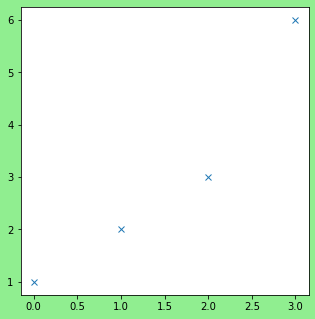

In [ ]:
ax1.clear()
ax1.plot([1,2,3,6],'x')
fig

Sporządzanie kolejnych wykresów dodaje je do wspólnego rysunku. Możemy wyczyścić zarówno ```figure``` jak i ```axes``` (np. ```ax1.clear()```).

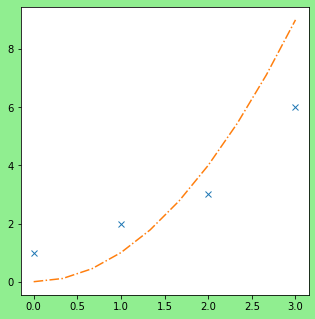

In [ ]:
x=np.linspace(0,3,10)
y=x**2
ax1.plot(x,y,linestyle='-.')
fig

In [ ]:
fig.clear()
fig

<Figure size 360x360 with 0 Axes>

Obrazek (figure) i umieszczoną w nim siatkę układów odniesienia (axes) można wygenerować jednym poleceniem

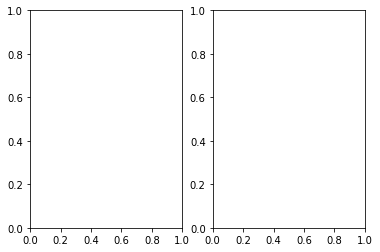

In [ ]:
fig2, axes2 = plt.subplots(1,2)
?plt.subplots

Wykresy można ubogacać o osie, tytuły, legendę itd. (co tylko się zapragnie).

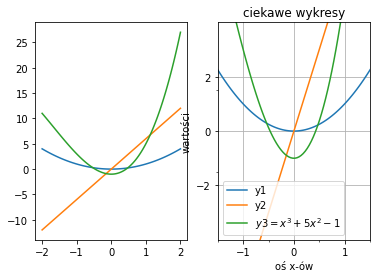

In [ ]:
ax21.clear()
ax22.clear()

x=np.linspace(-2,2,100)
y1=x**2
y2=6*x
y3=x**3+5*x**2-1
ax21.plot(x,y1)
ax21.plot(x,y2)
ax21.plot(x,y3)
#------------------------teraz wersja ulepszona
ax22.plot(x,y1,label='y1')
ax22.plot(x,y2,label='y2')
ax22.plot(x,y3,label='$y3=x^3+5x^2-1$')
ax22.legend()

#Dodawanie opisów osi i rysunku (na dwa sposoby)
#ax22.set_xlabel('oś x-ów')
#ax22.set_ylabel('wartości')
#ax22.set_title('ciekawe wykresy')
ax22.set(xlabel='oś x-ów', ylabel='wartości', title='ciekawe wykresy')

#Określanie limitów osi
ax22.axis([-1.5,1.5,-4,4]) #albo ax22.set_xlim(-1.5,1.5)

#Określanie podziałek na osiach i dodanie kraty
ax22.set_xticks([-1,0,1])
ax22.set_yticks([0,2,-2])
ax22.set_yticks([0,1.5,-1.5], minor=True)
ax22.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(6)) #automatyczne utworzenie drobniejszych podziałek które domyślnie nie generują gridu
ax22.grid()
fig2

### Najważniejsze typy wykresów dla danych 1D:

* liniowy ```ax.plot```
* punktowy ```ax.scatter``` (każdy punkt ma indywidualne własności)
* słupkowy ```ax.bar```
* histogram ```ax.hist``` [porównanie](https://medium.com/@georginasampson4/matplotlibs-bargraph-vs-histogram-960e9125a0a5)

#### Wykresy liniowe

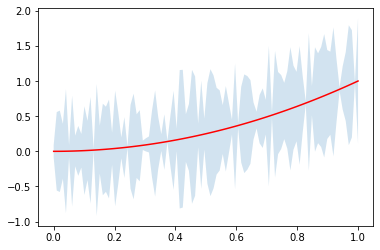

In [ ]:
fig,ax=plt.subplots()
error=np.random.random(100)
x=np.linspace(0,1,100)
y=x**2
ax.plot(x,y,color='red')
ax.fill_between(x,y-error,y+error,alpha=0.2)

#### Punktowe

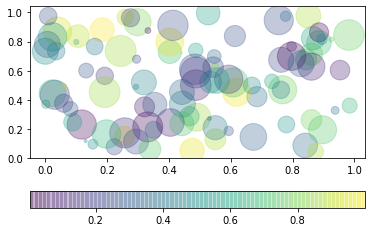

In [ ]:
fig3,ax3=plt.subplots()
x = np.random.random(100)
y = np.random.random(100)
colors = np.random.random(100)
sizes = 1000 * np.random.random(100)

image=ax3.scatter(x, y, c=colors, s=sizes, alpha=0.3)
fig3.colorbar(image,orientation = 'horizontal')

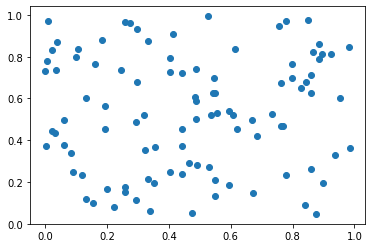

In [ ]:
fig,ax=plt.subplots()
ax.plot(x,y,'o')

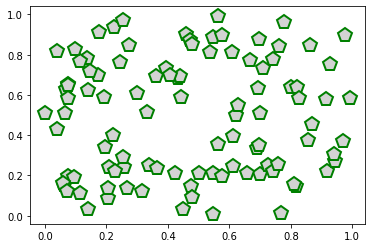

In [ ]:
fig,ax=plt.subplots()
ax.plot(x, y, 'p',
         markersize=15, linewidth=4,
         markerfacecolor='lightgray',
         markeredgecolor='green',
         markeredgewidth=2)


In [ ]:
?ax.plot

#### Zadanie
Narysuj wykres funkcji $x^3-4x^2+3x-4$ na odcinku $[-1,4]$ niebieską przerywaną linią. Znajdź (wykorzystując poznane dotychczas metody) lokalne maksima i minima tej funkcjina $(-1,4)$ i zaznacz je na rysunku - maksima jako zielone kółka, a minima jako czerwone krzyżyki.

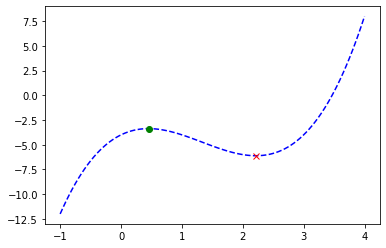

In [ ]:
import sympy as sp
x=sp.symbols('x')
f=x**3-4*x**2+3*x-4
D2f=f.diff(x,2)
extrema=sp.solve(f.diff(x))

fig,ax=plt.subplots()
inter=np.linspace(-1,4,100)
g=sp.lambdify(x,f)
ax.plot(inter,g(inter),color='blue',linestyle='--')
for el in extrema:
    if (el>-1 and el<4 and D2f.subs(x,el)>0):
        ax.plot(el,g(el),color='red',marker='x')
    if (el>-1 and el<4 and D2f.subs(x,el)<0):
        ax.plot(el,g(el),color='green',marker='o') 

        

#### Słupkowe/histogramy

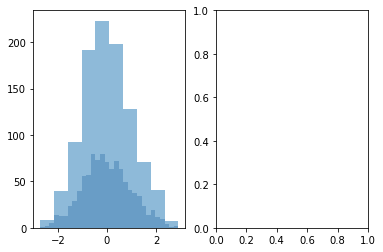

In [ ]:
data = np.random.randn(1000) #próbka z rozkładu normalnego
data2=np.random.random(1000)
fig,ax=plt.subplots(1,2)
ax[0].hist(data,alpha=0.5)
ax[0].hist(data, bins=30, alpha=0.5,
         color='steelblue',
         edgecolor='none');

<BarContainer object of 4 artists>

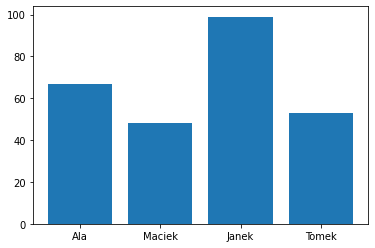

In [ ]:
fig,ax=plt.subplots()
uczniowie=['Ala','Maciek','Janek','Tomek']
wyniki=[67,48,99,53]
ax.bar(uczniowie,wyniki)

### Wykresy 2D danych wielowymiarowych 
* ```plt.quiver``` - strzałki, pole wektorowe $f:R^2\to R^2$
* ```plt.contour``` - wykres konturowy, poziomice funkcji $f:R^2\to R$
* ```plt.contourf``` - z wypełnieniem
* ```plt.imshow``` - wykres jako obrazek



(-2.0, 2.0, -2.0, 2.0)

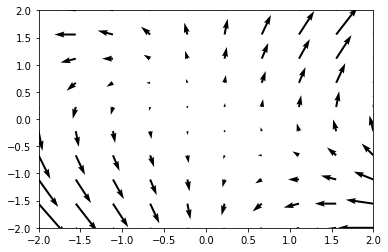

In [ ]:
#quiver
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
fig,ax=plt.subplots()
ax.quiver(X,Y,X*Y,X+Y)
ax.axis([-2,2,-2,2])

#### Zadanie 
Narysuj wykres pola wektorowego $F(x,y)=(1-x^2+y,1+x+y^2)$ na obszarze $K=[-3,3]\times[-3,3]$.

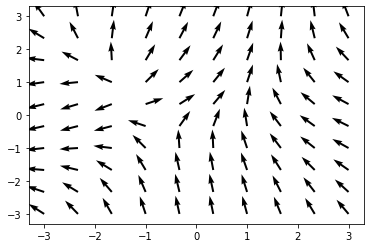

In [ ]:
#rozwiązanie
X,Y=np.meshgrid(np.linspace(-3,3,10),np.linspace(-3,3,10))
fig,ax=plt.subplots()
WX=1-X**2+Y
WY=1+X+Y**2
WXN=WX/(np.sqrt(WX**2+WY**2))
WYN=WY/(np.sqrt(WX**2+WY**2))
ax.quiver(X,Y,WXN,WYN)




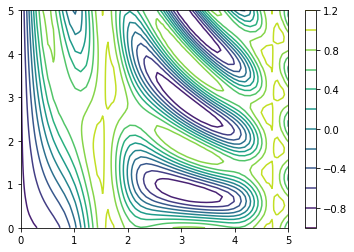

In [ ]:
#contour
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
x = np.linspace(0, 5, 50)
y = np.linspace(0,5, 50)
X, Y = np.meshgrid(x, y)
fig,ax=plt.subplots()
im=ax.contour(X,Y,f(X,Y),10)
fig.colorbar(im)

#### Obrazki

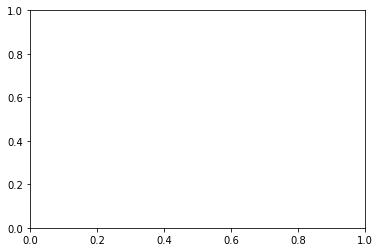

In [ ]:
fig,ax=plt.subplots()

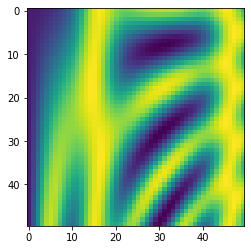

In [ ]:
plt.imshow(f(X,Y))

#### Zadanie
Narysuj czarno-białą szachownicę 8x8 z czarnym polem w lewym dolnym rogu. Usuń oznaczenia osi. Umieść krzyżyki na białej przekątnej.

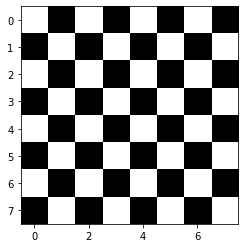

In [ ]:
ChB=np.fromfunction(lambda i,j:i+j+1,(8,8)) %2
fig,ax=plt.subplots()
ax.imshow(ChB,cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
ax.plot(np.arange(8),np.arange(8),'x')


<class 'numpy.ndarray'>
(524, 800, 3)


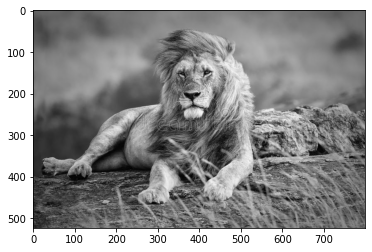

In [ ]:
from skimage.io import imread, imsave #wczytywanie i zapisywanie obrazków
im=imread('https://thumbs.dreamstime.com/b/mighty-beautiful-lion-resting-african-savannah-black-white-kenya-96042281.jpg')
print(type(im))
print(im.shape)
plt.imshow(im)

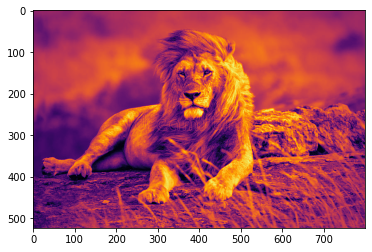

In [ ]:
plt.imshow(im[:,:,1],cmap='inferno')

In [ ]:
im2=0.299*im[:,:,0]+0.587*im[:,:,1]+0.114*im[:,:,2]

In [ ]:
U,Sigma,V=np.linalg.svd(im2)
print('Bajty trzech macierzy przed kompresją: ',U.nbytes+Sigma.nbytes+V.nbytes)
print('Bajty obrazka przed kompresją: ',im2.nbytes)

Bajty trzech macierzy przed kompresją:  7320800
Bajty obrazka przed kompresją:  3353600


In [ ]:
k=50
Sigma1=Sigma[:k]
U1=U[:,:k]
V1=V[:k,:]

imNew=np.dot(U1,np.dot(np.diag(Sigma1),V1))
print('Bajty trzech macierzy po kompresji: ',U1.nbytes+V1.nbytes+Sigma1.nbytes)

Bajty trzech macierzy po kompresji:  530000


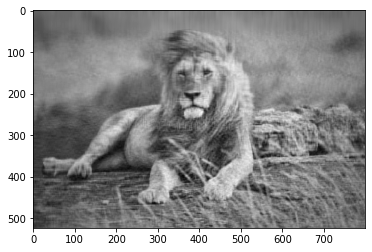

In [ ]:
plt.imshow(imNew,cmap='gray')

#### Zadanie domowe nr 1
* Wczytaj dowolny kolorowy obrazek RGB
* Odbij go w poziomie
* Zamień wartościami warstwę czerwoną z zieloną

[Więcej numpy na obrazkach](https://note.nkmk.me/en/python-numpy-image-processing/)

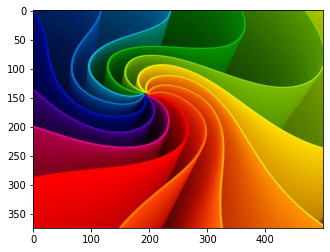

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from skimage.io import imread, imsave
im=imread('https://www.akademiaprodukcji.pl/wp-content/uploads/kolory.jpg')
plt.imshow(im)

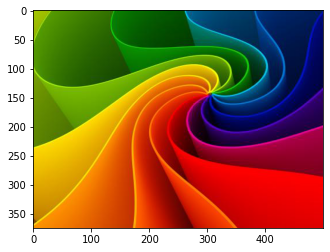

In [32]:
z=np.fliplr(im)
plt.imshow(z)

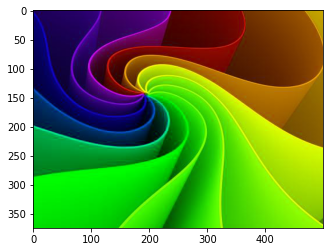

In [33]:
im_copy = im.copy()
im_copy[:,:,0],im_copy[:,:,1]=im[:,:,1],im[:,:,0]
plt.imshow(im_copy)

#### Zadanie domowe nr 2
Stwórz taki obrazek jak poniżej i nadaj mu tytuł oznaczając imieniem i nazwiskiem. Są na nim wykresy funkcji $y(x)=x^3+5x^2+10$ oraz jej pierwszej i drugiej pochodnej. Im dokładniej odwzorowany obrazek tym lepiej (więcej punktów). Obrazek (Figure) ma proporcje 5:3.
![obrazek](https://raw.githubusercontent.com/danio2010/ON2022/1ed3d5c630585f6e4ea453ff822124f8b0c24b36/lab7-homework.png)

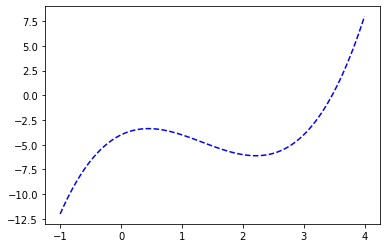

In [34]:
import sympy as sp
x=sp.symbols('x')
f=x**3-4*x**2+3*x-4
D2f=f.diff(x,2)
extrema=sp.solve(f.diff(x))

fig,ax=plt.subplots()
inter=np.linspace(-1,4,100)
g=sp.lambdify(x,f)
ax.plot(inter,g(inter),color='blue',linestyle='--')